In [2]:
%load_ext tikzmagic

# 확률 모형

## 확률적 데이터와 확률 모형

확률적 데이터는 보통 일련의 실험(experiment) 혹은 조사(research) 행위에 의해 얻어진다. 예를 들어 주사위를 던지는 실험을 통해 나오는 숫자를 하나씩 적거나 자동차 엔진의 출력을 측정하는 실험을 해서 나오는 숫자를 적어 데이터를 확보하는 경우를 생각해 보자. 이 결과로 나온 데이터에는 데이터를 생성하게 한 무언가, 즉 데이터 생성기(data generator)가 존재한다. 이 예에서는 주사위나 자동차 엔진이 될 것이다.

확률적 데이터를 분석할 때는 데이터를 생성한 구체적인 데이터 생성기가 존재하지 않더라도 다음처럼 가상의 데이터 생성기가 존재한다고 생각한다. 

1. 데이터가 될 수 있는 후보자 집합: 가능한 모든 데이터값으로 이루어진 **표본 공간** $\Omega$가 존재한다고 가정한다. 
2. 데이터가 선택되는 방법: 표본 공간의 모든 사건에 대해서 **확률**이 배정되어 있다고 가정한다. (엄밀하게는 모든 사건이 아니어도 되지만 여기에서는 이렇게 생각하자.)

표본 공간과 확률이 정의되어 있을 때 표본이 확률적으로 선택되는 것처럼 데이터도 데이터를 확률적으로 생성할 수 있는 어떤 기계(machine) 혹은 기작(mechanisom)이 존재한다고 가정한다. 이를 **확률 모형**이라고 부른다. 

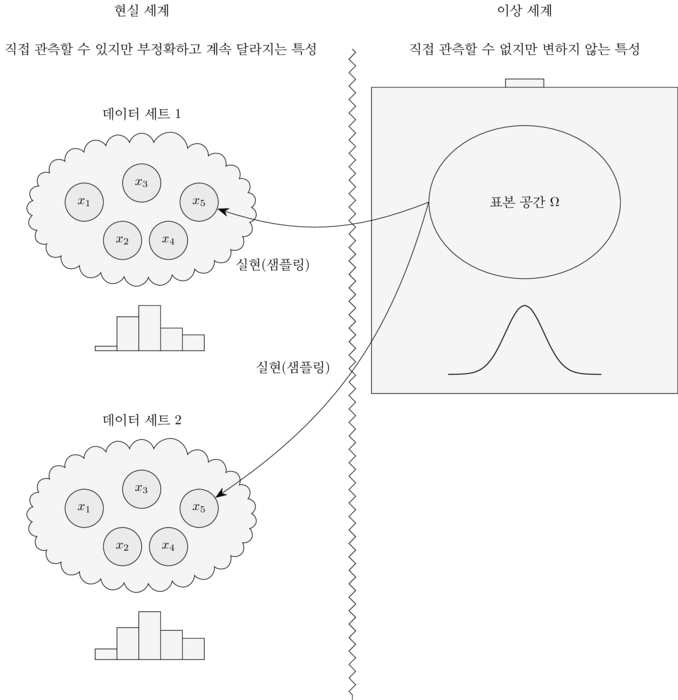

In [37]:
%%tikz -sc 1 -s 800,700 -l arrows.meta,shapes,decorations.pathmorphing,datavisualization,datavisualization.formats.functions -p pgfplots,kotex

\draw[decorate, decoration=zigzag] (10.5, 8) -- (10.5, -9);

\node at (15, 9) {이상 세계};
\node at (5, 9) {현실 세계};
\node at (12, 6.5) {확률 변수};
\node at (16, 1) {확률};

\begin{scope}[local bounding box=scope1]
\node[draw, rectangle, fill=gray!10, minimum width=1cm, minimum height=0.2cm] at (15, 7.1) {};
\node[draw, rectangle, fill=gray!10, minimum width=8cm, minimum height=8cm]  at (15, 3) {};
\node[draw, ellipse, fill=gray!10, minimum width=5cm, minimum height=4cm] (X) at (15, 4) {};
\node at (15, 4) {표본 공간 $\Omega$};
\end{scope}

\begin{scope}[shift={(15, -0.5)}]
\datavisualization[school book axes, visualize as smooth line, all axes={ticks={major={at={}}}}]
data [format=function] {
    var x : interval [-2:2];
    func y = 1.8 * exp(-2 * \value x * \value x);
};
\end{scope}
\node at (15, 8) {직접 관측할 수 없지만 변하지 않는 특성};


\begin{scope}
\node at (5, 6.3) {데이터 세트 1};
\node[draw, cloud, fill=gray!10, cloud puffs=1cm, minimum width=6cm, minimum height=4cm] at (5, 3.8) {};
\foreach[count=\i] \x/\y in {3.5/4, 4.5/3, 5/4.5, 5.7/3, 6.5/4}
  \node[draw, circle, fill=gray!20, minimum width=1cm, minimum height=1cm] (x_\i) at (\x, \y) {$x_\i$};
\draw[-{Stealth[length=3mm]}, bend left] (X.west) to[out=20, in=160] node[below=0.8cm, near end] {실현(샘플링)} (x_5);
\end{scope}


\begin{scope}[shift={(3.5, 0)}]
\begin{axis}[width=5cm, height=3cm, xtick=0, ytick=0, hide x axis, hide y axis]
\addplot+[color=black, fill=gray!10, ybar interval, mark=no] 
plot coordinates { (0, 2) (5, 15) (10, 20) (15, 10) (20, 7) (25, 0) };
\end{axis}
\end{scope}
\node at (5.5, 8) {직접 관측할 수 있지만 부정확하고 계속 달라지는 특성};

\begin{scope}[shift={(0, -8)}]
\node at (5, 6.3) {데이터 세트 2};
\node[draw, cloud, fill=gray!10, cloud puffs=1cm, minimum width=6cm, minimum height=4cm] at (5, 3.8) {};
\foreach[count=\i] \x/\y in {3.5/4, 4.5/3, 5/4.5, 5.7/3, 6.5/4}
  \node[draw, circle, fill=gray!20, minimum width=1cm, minimum height=1cm] (x_\i) at (\x, \y) {$x_\i$};
\draw[-{Stealth[length=3mm]}, bend left] (X.west) to[out=20, in=160] node[above=1.5cm, near end] {실현(샘플링)} (x_5);
\end{scope}

\begin{scope}[shift={(3.5, -8)}]
\begin{axis}[width=5cm, height=3cm, xtick=0, ytick=0, hide x axis, hide y axis]
\addplot+[color=black, fill=gray!10, ybar interval, mark=no] 
plot coordinates { (0, 4) (5, 12) (10, 18) (15, 11) (20, 8) (25, 1) };
\end{axis}
\end{scope}

## 샘플링, 실현

우리가 가진 데이터가 확률모형이라고 하는 가상의 주사위에 의해 생성된 것이라고 할 때, 이 주사위를 던져서 데이터를 생성하는 과정을 표본화, 수집, **샘플링**(sampling) 또는 **실현**(realization)이라고 한다. 또한 샘플링을 통해 얻어진 데이터를 표본이라고 한다. 

샘플링은 다른 의미로도 사용되는데 많은 수의 데이터 집합에서 일부 데이터만 선택하는 과정도 샘플링이라고도 한다. 

## 확률 모형과 표본 데이터의 특성

확률 모형과 실제 데이터는 다음과 같은 관계가 있다.

* 확률 모형으로부터 데이터를 여러번 생성하는 경우 실제 데이터 값은 매번 달라질 수 있지만 확률 모형 자체는 변하지 않는다.
* 확률 모형은 우리가 직접 관찰할 수 없다. 다만 확률 모형에서 만들어지는 실제 데이터 값을 이용하여 확률 모형이 이러한 것일 거라고 추정하고 가정할 뿐이다.
* 확률 모형에서 만들어 지는 실제 데이터의 값은 확률 모형이 가진 특성을 반영하고 있다. 다만 데이터의 갯수가 적을 수록 부정확하여 확률 모형이 가진 특징을 정확하게 추정할 수 없다. 
 

## 확률 모형의 종류

확률 모형은 확률 질량 함수(pmf) 혹은 확률 밀도 함수(pdf)에 의해 결정된다. 현실 세계에게 무한한 종류의 데이터가 있지만 많은 연구 결과 그 데이터의 대부분은 수십가지 정도의 대표적인 확률 모형에서 생성된 것이라고 볼 수 있다는 것을 알게되었다. 이렇게 많이 접할 수 있는 확률 모형은 그 확률 밀도 함수가 쉬운 수식으로 표현되며 여러가지 특성에 대한 연구가 많이 이루어져있다. 


## 데이터 분석의 과정

확률 모형을 사용하는 경우, 대부분의 데이터 분석은 다음과 같은 과정을 거친다.

1. 데이터를 확보한다.
2. 확보된 데이터를 어떤 확률 모형의 표본으로 가정한다.
3. 데이터의 특성으로부터 확률 모형의 특성을 추정한다. 
4. 구해진 확률 모형의 특성으로 해당 확률 모형의 종류를 결정하고 모수를 추정한다.
5. 구해진 확률 모형으로부터 다음에 생성될 데이터나 데이터 특성을 예측한다.